## Lesson-01

<font color = purple size=4 face="黑体">如果给定一个语法，我们怎么生成一个语法呢?</font>


最简单的例子：

In [1]:
import random

In [2]:
two_number = """
2_num => num num
num => 0 | 1 | 2 | 3 | 4
"""

In [9]:
def two_num():
    return num() + num()

def num(): 
    #返回['0', '1', '2', '3', '4']中的任意一个数
    return random.choice("0 | 1 | 2 | 3 | 4".split('|')) 

In [10]:
num()

' 3 '

In [11]:
two_num()

' 3  4'

In [27]:
#two_number改为numbers
two_number = """
#numbers => num numbers | num
#通常将numbers写成num*，表示一个或多个
num* => num num* | num
num => 0 | 1 | 2 | 3 | 4
"""
def two_num():
    return num() + num()

def num(): 
    #返回['0', '1', '2', '3', '4']中的任意一个数
    return random.choice("0 | 1 | 2 | 3 | 4".split('|'))

def numbers():
    if random.random()<0.5:
        return num()
    else:
        return num() + numbers()

In [23]:
numbers()

' 3 '

In [28]:
for i in range(10):
    print(numbers())

 2 
0  1 
0 
 2  3  2 0 0  4
 2 
 3  1 0 
0  1 
 1  3 
 2 
0  1 0 0 


<font color = purple size=4 face="黑体">1.语法可以通过最简单的函数来实现。<br> 2.我们可以通过递归，来实现更复杂或“无限”长的文字</font>

升级一点的:

In [41]:
%matplotlib inline
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun 
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [18]:
import random

In [19]:
def adj():  
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def adj_star():
    #为什么如果不用if-else的random，我们需要用lambda
    #A:adj()只包含返回一个形容词的情况，adj_star()包含所有情况，零个|一个|多个
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [20]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [21]:
adj_star()

''

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [29]:
two_number = """
two => num num
num => 0 | 1 | 2 | 3 | 4
"""

In [30]:
two_number_add = """
two => num + num
num => 0 | 1 | 2 | 3 | 4
"""

In [31]:
two_number_op ="""
two => num + num | num - num
num => 0 | 1 | 2 | 3 | 4
"""

In [32]:
two_number_op2 ="""
two => num op num
op => + | - | * | /
num => 0 | 1 | 2 | 3 | 4
"""

In [33]:
number_ops = """
expression => expression num_op | num_op
num_op => num op num
op => + | - | * | /
num => 0 | 1 | 2 | 3 | 4
"""

<font size=4>**语法不同，如何生成句子？**</font>

**Step1：将语法转换成字典格式**

In [29]:
{
    'two':[['num + num'],['num-num']],
    'num':['1','2','3','4','5','6']
} 
#num is a key(expand)
#+ is not a key(output)

{'two': ['num + num'], 'num': ['1', '2', '3', '4', '5', '6']}

In [57]:
#课上代码，一步步详解版
def generate_grammar(grammar_str:str,target,split='=>'):
    grammar={}
    
    for line in grammar_str.split('\n'):
        if not line:continue #空行就不处理
            
        expression, formula = line.split(split)
        
        formulas = formula.split('|')
        
        formulas =[f.split() for f in formulas] #split后的()不能忘
        
        grammar[expression.strip()] = formulas
        
        #print(expression,':',formulas)
        
    return grammar

In [11]:
"""
#上段代码的简单版，来自准备代码
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar
"""

In [52]:
generate_grammar(two_number_add,target='two')

two  : [' num + num']
num  : [' 0 ', ' 1 ', ' 2 ', ' 3 ', ' 4']


In [68]:
generate_grammar(two_number_op,target='two')

two  : [['num', '+', 'num'], ['num', '-', 'num']]
num  : [['0'], ['1'], ['2'], ['3'], ['4']]


In [35]:
generated_grammar = generate_grammar(two_number_op,target='two')

two  : [['num', '+', 'num'], ['num', '-', 'num']]
num  : [['0'], ['1'], ['2'], ['3'], ['4']]


In [36]:
generated_grammar

{'two': [['num', '+', 'num'], ['num', '-', 'num']],
 'num': [['0'], ['1'], ['2'], ['3'], ['4']]}

In [44]:
generated_grammar1 = generate_grammar(simple_grammar,target='sentence')

sentence  : [['noun_phrase', 'verb_phrase']]
noun_phrase  : [['Article', 'Adj*', 'noun']]
Adj*  : [['null'], ['Adj', 'Adj*']]
verb_phrase  : [['verb', 'noun_phrase']]
Article  : [['一个'], ['这个']]
noun  : [['女人'], ['篮球'], ['桌子'], ['小猫']]
verb  : [['看着'], ['坐在'], ['听着'], ['看见']]
Adj  : [['蓝色的'], ['好看的'], ['小小的']]


In [43]:
generated_grammar1

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

**Step2：输入为“字典格式”，如何生成一个句子？**

In [48]:
choice = random.choice

def generate_by_grammar(grammar:dict, target:str):
    if target not in grammar:return target
    # the abouve line is to test if target is a key
    expr = choice(grammar[target])
    expaned = [generate_by_grammar(grammar,t) for t in expr]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [22]:
"""
#来自准备代码
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])
"""

In [50]:
generate_by_grammar(generated_grammar,'two')

'4-2'

In [49]:
generate_by_grammar(generated_grammar1,'sentence')

'一个篮球听着一个桌子'

**Step3：编写generate_by_str直接调用以上两个函数**

In [58]:
def generate_by_str(grammar_str,target,split='=>'):
    grammar = generate_grammar(grammar_str,target,split)
    return generate_by_grammar(grammar,target)

In [59]:
generate_by_str(two_number_op,target='two')

'1+4'

In [60]:
generate_by_str(simple_grammar,target='sentence')

'这个蓝色的小猫听着这个蓝色的桌子'

**总结一下：**

In [61]:
def generate_grammar(grammar_str:str,target,split='=>'):
    grammar={}
    
    for line in grammar_str.split('\n'):
        if not line:continue
        expr, stmt = line.split(split)
        grammar[expr.strip()] = [s.split() for s in stmt.split('|')]    
    return grammar

choice_a_expr = random.choice
def generate_by_grammar(grammar:dict, target:str):
    if target not in grammar:return target
    expr = choice(grammar[target])
    expaned = [generate_by_grammar(grammar,t) for t in expr]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

def generate_by_str(grammar_str,split,target):
    grammar = generate_grammar(grammar_str,target,split)
    return generate_by_grammar(grammar,target)

In [62]:
generate_by_str(two_number_op,split='=>',target = 'two')

'4+1'

In [63]:
generate_by_str(number_ops,split='=>',target = 'expression')

'4-24-31*3'

<font color = purple size=4 face="黑体">我们发现，式子变长了。<br>
优点：输入改变，程序不需要重新写</font>

<font color = purple size=4 face="黑体">Eliza (MIT的人工智能实验室推出的第一个商用产品)<br>规则引擎</font>

In [105]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

希望能够生成最合理的一句话？ 

## Data Driven

<font color = purple size=4 face="黑体">Compare: Procedure Driven<br>->识别任何物体都要根据特征重新写程序</font>

<font color = purple size=4 face="黑体">Machine Learning: Based on Statistical Data Driven Way</font>

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

**例子：西部世界**

In [176]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [164]:
for i in range(10):
    print(generate_by_str(host,split='=', target='host'))

小朋友,您好我是8号,您需要null赌博吗？
您好我是66号,您需要null赌博吗？
先生,你好我是2号,您需要null打牌吗？
女士,您好我是4号,请问你要null赌博吗？
先生,您好我是3号,您需要null喝酒吗？
女士,你好我是5号,您需要null赌博吗？
女士,您好我是58号,请问你要null打猎吗？
您好我是25号,请问你要null赌博吗？
你好我是65359号,请问你要null喝酒吗？
小朋友,你好我是3号,您需要null赌博吗？


In [106]:
for i in range(10):
    print(generate_by_str(human,split='=', target='human'))

我们找找玩的
我找找乐子
我想找点乐子
我找找乐子
俺想找点玩的
我们找找乐子
我找找乐子
我找找乐子
俺找找玩的
我想找点玩的


**例子：假如既然**

In [64]:
假如既然 = """
句子 = if someone state , then do something
if = 既然 | 如果 | 假设
someone = one 和 someone | one
one = 小红 | 小蓝 | 小绿 | 白白
state = 饿了 | 醒了 | 醉了 | 癫狂了
then = 那么 | 就 | 可以
do = 去
something = 吃饭 | 玩耍 | 浪
"""

In [177]:
for i in range(20):
    print(generate_by_str(假如既然, split='=',target='句子'))

假设小红癫狂了,那么去吃饭
假设小红和小红和小蓝醒了,就去玩耍
既然白白和白白和小绿和小绿饿了,那么去浪
既然小红醉了,那么去玩耍
既然小红饿了,就去浪
既然小绿和小红醒了,那么去吃饭
既然白白和白白和白白饿了,那么去浪
既然小红癫狂了,那么去吃饭
假设小蓝饿了,就去玩耍
既然小红和小蓝醉了,可以去浪
既然小蓝和小红醒了,可以去玩耍
假设小绿醒了,就去吃饭
既然小蓝和白白癫狂了,就去浪
如果小红饿了,就去玩耍
既然小绿饿了,可以去浪
既然白白和白白和小红醉了,就去吃饭
如果小绿和小红醒了,可以去吃饭
既然小红和小蓝醉了,那么去吃饭
假设小红醒了,可以去浪
既然白白癫狂了,就去玩耍


<font color = purple size=4 face="黑体">以上“假如既然”的例子说明输入不同，也可以用简单的方法解决问题 </font>

**例子：电脑写程序**

In [66]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [79]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [80]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [81]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

while(database<database_8){/Ninfo_info_5=name_name_database_name_2/N}


In [82]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [83]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [84]:
for line in generated_programming:
    print(line)

if(infoname_5_0_9_5){
  if(name_8_5_3_2==student){
    info_9=info_name
      }else{
        if(name<=name_database_lib){
          if(name_libname_0_9){
            if(info_3_1<lib_database_info_1_6){
              name_student_6_5_7_6=name_lib_9
       }else{
      student_0_1_6=lib
     }
    }
   }
  }
 }
while(database_8<info_lib_4){
  if(database_1_0<student_info){
    if(student_databasestudent){
      if(lib_database==database_9){
        if(studentdatabase_name_lib){
          if(student_database_info_info_3_8<=database_9_7_3_5){
            if(lib_4_8_1_9_8_4_6_0_0==name_lib){
              if(info_student<name){
                name=database_1
                  }
                    }
                      }
                        }else{
                          if(info_name_4_9_4name_name){
                            if(database_3<name_lib_name_info_9){
                              student_4=database_1
                                }
                                  

# Language Model

<font color = purple size=4 face="黑体"> 1.条件概率<br>2.独立概率</font>

<font color = purple size=4 face="黑体"> **1.条件概率?**<br>假设你365天，迟到30次<br>P(迟到)=30/365<br>假如一年中60次拉肚子，其中20次迟到了<br>P(迟到|拉肚子)=20/60 = P(迟到&拉肚子)/P(拉肚子)=P(20/365)/(60/365)=20/60 <br>P(迟到 | 伊利诺伊发生车祸)= P(你迟到) = P(你迟到&伊利诺伊发生车祸)/P(伊利诺伊发生车祸)<br>P(你迟到&伊利诺伊发生车祸)=P(你迟到)*P(伊利诺伊发生车祸)<br>P(你迟到|肚子痛&伊利诺伊发生车祸)=P(你迟到|肚子痛)</font>

<font color = purple size=4 face="黑体">  P(其实就和随机森林原理一样)<br>= P(其实&就和&随机森林&原理&一样)<br>= P(其实|就和&随机森林&原理&一样) \* P(就和&随机森林&原理&一样)<br>#语言学家对句法做了简化，假设每个词语只与后面一个词语有关<br>= P(其实|就和) \* P(就和|随机森林&原理&一样) \* P(随机森林&原理&一样)<br>= \...<br>= P(其实|就和) \* P(就和|随机森林) \* P(随机森林|原理) \* P(原理|一样) \* P(一样)</font>

<font color = purple size=4 face="黑体">$$P(其实|就和) = \frac{\#其实就和}{\#就和}   = \frac{w_1w_2}{w_2}$$</font>

<font color = purple size=4 face="黑体">$$P(sentence) = P(w_1w_2w_3w_4)=\prod_{i=0}^{n}\frac{\#W_iW_{i+1}}{\#W_{i+1}}*P(w_{n})$$</font>

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

<font color = purple size=4 face="黑体"> **Tips: UnicodeDecodeError怎么办?**<br>
python chardet可能出错<br>
搜索python encoding -> Standards encoding</font>

**Basics：random**

In [3]:
import random

In [4]:
random.choice(range(100))

16

**Step1：下载数据**

In [2]:
import pandas as pd

In [1]:
filename = '/Users/wy/Desktop/NLP/Lesson/Dataset/sqlResult_1558435.csv'

In [3]:
content = pd.read_csv(filename, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [6]:
articles = content['content'].tolist()

In [10]:
len(articles)

89611

In [11]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

**Step2:清洗文本**

<font color = purple size=4 face="黑体">  想把某些东西去掉，比如\r\n，需要正则表达式。正则表达式根据特定的规则获取想要的东西</font>

In [10]:
import re #正则表达式

In [11]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string) #\w指所有的words

In [95]:
token(articles[-1])

['新华社德国杜塞尔多夫６月６日电题',
 '乒乓女球迷',
 'n',
 '新华社记者王子江',
 '张寒',
 'n',
 '熊老师离开上海前',
 '特意花一千多元买了一只张继科代言的球拍',
 '准备在世界锦标赛期间他赢了比赛后',
 '能在球拍上签个名',
 '但没想到张继科在３２强赛中',
 '输给了韩国的李尚洙',
 'n',
 '拍子算是白拿过来了',
 '熊老师摇头',
 '就算是信仰充值了',
 'n',
 '信仰充值',
 '是乒乓球粉丝圈非常流行的词汇',
 '简单来说',
 '就是为自己喜欢的明星或球队花钱',
 'n',
 '熊老师',
 '是这位２２岁的成都姑娘的',
 '艺名',
 '艺名',
 '这一称呼也是她们自己形容的',
 '熊老师的真实身份是上海一所名牌大学会计专业的大四学生',
 '其他同学正在抓紧毕业找工作',
 '她一个人溜到德国观看世乒赛',
 '尽管带着张继科的球拍',
 '但熊老师并不是张的铁粉',
 '她并不喜欢张继科输了比赛之后',
 '一堆',
 '科迷',
 '在赛场外抱头痛哭的场景',
 '而显得比较理智',
 '但是因为',
 '科迷',
 '数量众多',
 '让她这种散户',
 '也有些说不出的羡慕',
 'n',
 '他们竟然连续两天买断了一面看台上所有的门票',
 '为的是挂起带有张继科名字的旗子',
 '两天就要花４',
 '５万人民币',
 '熊老师直喊过分',
 'n',
 '熊老师与其他１０名中国队女球迷挤在一套三居室里',
 '厨房的柜子里塞了很多方便面',
 '至少三个人挤在一个房间里',
 '条件的确差了点',
 '但住宿费平摊下来每天只有大约２００元人民币',
 '这样让大家心里平衡了很多',
 'n',
 '房间里的所有人都是在网上认识的',
 '大家也并不全知道对方真实的姓名和身份',
 '我们都用艺名',
 '来自广州的茶茶说',
 '茶茶已经工作了几年',
 '这次也是利用假期出来的',
 'n',
 '所有人都是提前大约半年从国际乒联的官网上买了比赛的通票',
 '可以观看全程所有的比赛',
 '票价大约两千块人民币',
 '５月底６月初并不是旅游旺季',
 '机票也不是太贵',
 '这让她们都很庆幸',
 'n',
 '里面最幸运的应该是井井',
 '她这次来的身份是

In [14]:
print(str(articles[0]))
print(token(str(articles[0])))

此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。
MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。
当然，关于MIUI 9的确切信息，我们还是等待官方消息。

['此外', '自本周', '6月12日', '起', '除小米手机6等15款机型外', '其余机型已暂停更新发布', '含开发版', '体验版内测', '稳定版暂不受影响', '以确保工程师可以集中全部精力进行系统优化工作', '有人猜测这也是将精力主要用到MIUI', '9的研发之中', 'MIUI', '8去年5月发布', '距今已有一年有余', '也是时候更新换代了', '当然', '关于MIUI', '9的确切信息', '我们还是等待官方消息']


In [13]:
#清洗所有articles
articles_clean = [''.join(token(str(a)))for a in articles]

In [22]:
len(articles_clean)

89611

<font color = purple size=4 face="黑体">Tips:AI的问题中，65%都是在做数据预处理，假如做了很久的预处理，养成习惯把重要的信息及时保存至硬盘里。</font>

In [24]:
'''
#save to disk
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')
'''

In [25]:
#!ls命令报错
#solution:https://blog.csdn.net/weixin_43760295/article/details/93620024
#!ls
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7C14-352E

 Directory of C:\Users\wy\1.NPL

01/17/2020  12:46 PM    <DIR>          .
01/17/2020  12:46 PM    <DIR>          ..
01/17/2020  11:30 AM    <DIR>          .ipynb_checkpoints
01/17/2020  12:48 PM        64,368,892 article_9k.txt
01/17/2020  09:28 AM           283,246 article_9k_cut.txt
01/17/2020  12:46 PM            97,215 [M]Lecture-01-Syntax-Tree-and-Language-Model.ipynb
               3 File(s)     64,749,353 bytes
               3 Dir(s)  39,384,612,864 bytes free


**Basics: jieba和Counter**

In [7]:
import jieba #用来做汉语分词

In [16]:
#jieba.cut是一个generator
list(jieba.cut('这个是用来做汉语言分词的'))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wy\AppData\Local\Temp\jieba.cache
Loading model cost 1.087 seconds.
Prefix dict has been built successfully.


['这个', '是', '用来', '做', '汉语言', '分词', '的']

In [17]:
from collections import Counter

In [18]:
with_jieba_cut = Counter(jieba.cut(articles[110])) #计算

In [19]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [20]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

**Step3:文本切词**

In [96]:
import jieba

In [97]:
#def cut(string): return list(jieba.cut(string))
def cut(string): return jieba.cut(string)

In [29]:
'''
#方法一：TOKEN为generator
TOKEN = cut(open('article_9k.txt').read()) #TOKEN is a generator
'''

"\n#方法一：TOKEN为generator\nTOKEN = cut(open('article_9k.txt').read()) #TOKEN is a generator\n"

In [99]:
#'''
#方法二：预习材料里
TOKEN = []
for i, line in enumerate((open('article_9k.txt'))):
    if i % 10000 == 0: print(i)
    
    # replace 10000 with a big number(200000) when you do your homework. 
    
    if i > 500000: break    
    TOKEN += cut(line)
#'''

0
10000
20000
30000
40000
50000
60000
70000
80000


In [ ]:
'''
#方法二的课上代码，为加快速度采取的采样方法
All_Token = cut(open('article_9k.txt').read())
TOKEN=[]
for i, t  in enumerate(All_Token):
    if i > 500000: break
    if i % 10000 == 0:print(i)
    TOKEN.append(t)
'''

In [94]:
len(TOKEN)

500001

In [32]:
len(TOKEN)

200001

In [33]:
type(TOKEN)

list

In [34]:
"""
#save TOKEN to disk
with open('article_9k_cut.txt','w') as f:
    for a in TOKEN:
        f.write(a+'\n')
"""   

"\n#save TOKEN to disk\nwith open('article_9k_cut.txt','w') as f:\n    for a in TOKEN:\n        f.write(a+'\n')\n"

**Basics: reduce**

In [35]:
from functools import reduce

In [36]:
from operator import add, mul

In [37]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [38]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [39]:
from collections import Counter

In [40]:
words_count = Counter(TOKEN)

In [81]:
words_count['一杯']

0

In [41]:
len(words_count)

28898

In [42]:
words_count.most_common(10)

[('的', 11043),
 ('在', 2863),
 ('了', 2546),
 ('是', 1854),
 ('和', 1584),
 ('也', 1043),
 ('有', 930),
 ('月', 763),
 ('他', 762),
 ('将', 736)]

**画图：单词出现频率**

In [43]:
frequiences = [f for w, f in words_count.most_common(100)]

In [44]:
x = [i for i in range(100)]

In [45]:
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt

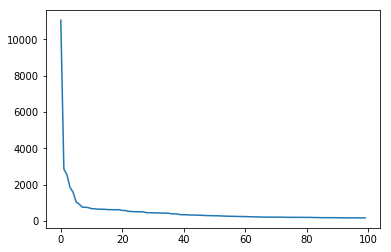

In [47]:
plt.plot(x, frequiences)

<font color = purple size=4 face="黑体">NLP比较重要的规律：在很大的一个文集中，第二个单词的出现频率是第一个单词的出现频率的1/2，第n个单词的出现频率是第1个单词的出现频率的1/n  </font>

In [48]:
import numpy as np

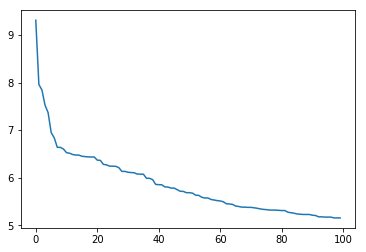

In [49]:
plt.plot(x, np.log(frequiences))

**Step4：Language Model**

<font color = purple size=4 face="黑体">$$P(sentence) = P(w_1w_2w_3w_4)=\prod_{i=0}^{n}\frac{\#W_iW_{i+1}}{\#W_{i+1}}*P(w_{n})$$</font>

In [100]:
#P(w_n) = words_count[]/len(token)
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [51]:
#calculate #w_{i+1}
words_count['我们'] #P(w_n) = words_count[]/len(token)

452

In [52]:
prob_1('我们')

0.0022599887000565

In [54]:
TOKEN = [str(t) for t in TOKEN]

In [55]:
#连接相邻的两个词
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [56]:
TOKEN_2_GRAM[-10:]

['提倡参赛者', '参赛者胆有', '胆有多', '多大', '大就', '就露', '露多少', '多少照片', '照片中', '中有人']

In [57]:
#计算相邻两个词的频率
words_count_2 = Counter(TOKEN_2_GRAM)

In [90]:
#原代码
#def prob_1(word): return words_count[word] / len(TOKEN)
#更改了一下，考虑words_count=0的情况
def prob_1(word):
    if words_count[word] == 0:
        return 1/len(TOKEN)
    else:
        return words_count[word] / len(TOKEN)

In [91]:
prob_1('一杯')

4.9999750001249995e-06

In [92]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / words_count[word2]
    else:
        return 1 / len(words_count) #out of vacabulary problem

In [93]:
prob_2('在', '吃饭')

3.4604470897639976e-05

In [94]:
prob_2('去', '吃饭')

3.4604470897639976e-05

In [98]:
#计算 P(sentence)
def get_probablity(sentence):
    words = list(cut(sentence))
    print(words)
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
    
        sentence_pro *= probability
        
        #print(sentence_pro)
        
    sentence_pro *= prob_1(words[-1]) 
    #print(sentence_pro)
    return sentence_pro

In [99]:
get_probablity('小明今天抽奖抽到一台苹果手机')

['小明', '今天', '抽奖', '抽到', '一台', '苹果', '手机']


4.962024392448898e-28

In [100]:
get_probablity('小明今天抽奖抽到一架波音飞机')

['小明', '今天', '抽奖', '抽到', '一架', '波音', '飞机']


2.8331857732509803e-31

In [101]:
get_probablity('洋葱奶昔来一杯')

['洋葱', '奶昔', '来', '一杯']


2.0718794013227872e-19

In [102]:
get_probablity('养乐多绿来一杯')

['养乐多', '绿来', '一杯']


5.9873170939425905e-15

In [107]:
#host的例子
for sen in [generate_by_str(host, target='host',split='=') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

['您好', '我', '是', '9651', '号', ',', '请问', '你', '要', 'null', '赌博', '吗', '？']
sentence: 您好我是9651号,请问你要null赌博吗？ with Prb: 3.8274478565798973e-53
['你好', '我', '是', '68', '号', ',', '请问', '你', '要', 'null', '赌博', '吗', '？']
sentence: 你好我是68号,请问你要null赌博吗？ with Prb: 8.582553156148427e-55
['先生', ',', '您好', '我', '是', '5', '号', ',', '请问', '你', '要', 'null', '喝酒', '吗', '？']
sentence: 先生,您好我是5号,请问你要null喝酒吗？ with Prb: 2.32436104650601e-56
['先生', ',', '您好', '我', '是', '2', '号', ',', '您', '需要', 'null', '赌博', '吗', '？']
sentence: 先生,您好我是2号,您需要null赌博吗？ with Prb: 1.6355663805733857e-54
['女士', ',', '您好', '我', '是', '6', '号', ',', '请问', '你', '要', 'null', '打牌', '吗', '？']
sentence: 女士,您好我是6号,请问你要null打牌吗？ with Prb: 8.155073558053755e-57
['您好', '我', '是', '424', '号', ',', '您', '需要', 'null', '赌博', '吗', '？']
sentence: 您好我是424号,您需要null赌博吗？ with Prb: 5.626348349172448e-51
['先生', ',', '您好', '我', '是', '5', '号', ',', '请问', '你', '要', 'null', '打牌', '吗', '？']
sentence: 先生,您好我是5号,请问你要null打牌吗？ with Prb: 2.32436104650601e-56
['小朋友'

In [108]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

['今天', '晚上', '请', '你', '吃', '大餐', '，', '我们', '一起', '吃', '日料']
['明天', '晚上', '请', '你', '吃', '大餐', '，', '我们', '一起', '吃', '苹果']
明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 7.411677517444064e-48
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 2.223503255233219e-46
['真', '事', '一只', '好看', '的', '小猫']
['真是', '一只', '好看', '的', '小猫']
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 3.752385042692723e-23
---- 真是一只好看的小猫 with probility 1.0843642296373433e-18
['今晚', '我', '去', '吃火锅']
['今晚', '火锅', '去', '吃', '我']
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.897088916423834e-16
---- 今晚火锅去吃我 with probility 2.071879401322787e-19
['洋葱', '奶昔', '来', '一杯']
['养乐多', '绿来', '一杯']
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.0718794013227872e-19
---- 养乐多绿来一杯 with probility 5.9873170939425905e-15


<font color = purple size=4 face="黑体">2-Gram模型的原理和代码实现。<br> More data, better result   </font>